# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

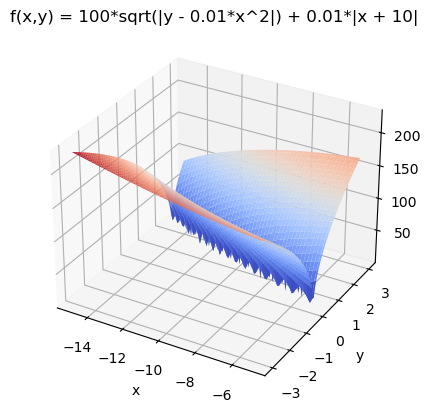

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x,y)
def f(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01 * x ** 2)) + 0.01 * np.abs(x + 10)

# Define the ranges of x and y
x_range = np.linspace(-15, -5, 100)
y_range = np.linspace(-3, 3, 100)

# Create a meshgrid of x and y values
X, Y = np.meshgrid(x_range, y_range)

# Evaluate f(x,y) for each combination of x and y
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_title('f(x,y) = 100*sqrt(|y - 0.01*x^2|) + 0.01*|x + 10|')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [7]:
import numpy as np

def f(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01 * x ** 2)) + 0.01 * np.abs(x + 10)

def generate_neighbors(x, y, step_size=0.1):
    neighbors = []
    neighbors.append((x + step_size, y))
    neighbors.append((x - step_size, y))
    neighbors.append((x, y + step_size))
    neighbors.append((x, y - step_size))
    neighbors.append((x + step_size, y + step_size))
    neighbors.append((x + step_size, y - step_size))
    neighbors.append((x - step_size, y + step_size))
    neighbors.append((x - step_size, y - step_size))
    return neighbors

def get_random_state():
    x = np.random.uniform(-15, -5)
    y = np.random.uniform(-3, 3)
    return (x, y)

def hill_climbing(step_size, max_iterations, max_repetitions):
    best_state = (0, 0)
    best_value = float('inf')  # Initialize with infinity
    
    for repetition in range(max_repetitions):
        current_state = get_random_state()
        current_value = f(*current_state)
        
        for i in range(max_iterations):
            neighbors = generate_neighbors(*current_state, step_size)
            best_neighbor = None
            best_neighbor_value = current_value
            
            for neighbor in neighbors:
                neighbor_value = f(*neighbor)
                if neighbor_value < best_neighbor_value:
                    best_neighbor = neighbor
                    best_neighbor_value = neighbor_value
            
            if best_neighbor is not None:
                current_state = best_neighbor
                current_value = best_neighbor_value
            else:
                break
                
        if current_value < best_value:
            best_state = current_state
            best_value = current_value
                
        print(f"Repetition {repetition}: x = {best_state[0]:.4f}, y = {best_state[1]:.4f}, f(x,y) = {best_value:.4f}")
                
    return best_value  # Return the best value

best_value = hill_climbing(step_size=0.1, max_iterations=100, max_repetitions=10)
print(f"Minimum value found: f(x,y) = {best_value:.4f}")


Repetition 0: x = -6.3860, y = 0.4133, f(x,y) = 7.4658
Repetition 1: x = -6.0859, y = 0.3747, f(x,y) = 6.6283
Repetition 2: x = -6.6026, y = 0.4335, f(x,y) = 4.9726
Repetition 3: x = -6.6026, y = 0.4335, f(x,y) = 4.9726
Repetition 4: x = -6.6026, y = 0.4335, f(x,y) = 4.9726
Repetition 5: x = -6.1001, y = 0.3718, f(x,y) = 1.9406
Repetition 6: x = -6.1001, y = 0.3718, f(x,y) = 1.9406
Repetition 7: x = -6.1001, y = 0.3718, f(x,y) = 1.9406
Repetition 8: x = -6.1001, y = 0.3718, f(x,y) = 1.9406
Repetition 9: x = -6.1001, y = 0.3718, f(x,y) = 1.9406
Minimum value found: f(x,y) = 1.9406


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [8]:
import numpy as np

def generate_items(max_weight, max_value, nr_elements):
    items = []
    for i in range(nr_elements):
        weight = np.random.randint(1, max_weight + 1)
        value = np.random.randint(1, max_value + 1)
        items.append((weight, value))
    return items

max_element_weight = 100
max_element_value = 200
nr_elements = 20
max_weight = 800

items = generate_items(max_element_weight, max_element_value, nr_elements)
print(items)

def fitness(bitstring):
    total_weight = 0
    total_value = 0
    for i in range(len(bitstring)):
        if bitstring[i] == '1':
            total_weight += items[i][0]
            total_value += items[i][1]
            if total_weight > max_weight:
                return 0
    return total_value

def get_neighbour(bitstring):
    neighbour = list(bitstring)
    zero_indices = [i for i in range(len(bitstring)) if bitstring[i] == '0']
    if len(zero_indices) > 0:
        i = np.random.choice(zero_indices)
        neighbour[i] = '1'
    return ''.join(neighbour)

def hill_climbing(max_iterations):
    current_bitstring = '0' * len(items)
    current_fitness = fitness(current_bitstring)
    best_bitstring = current_bitstring
    best_fitness = current_fitness

    for i in range(max_iterations):
        neighbour_bitstring = get_neighbour(current_bitstring)
        neighbour_fitness = fitness(neighbour_bitstring)
        
        if neighbour_fitness > best_fitness:
            best_bitstring = neighbour_bitstring
            best_fitness = neighbour_fitness

        if neighbour_fitness >= current_fitness:
            current_bitstring = neighbour_bitstring
            current_fitness = neighbour_fitness
        else:
            break

    return best_bitstring, best_fitness

best_bitstring, best_fitness = hill_climbing(max_iterations=100000)
print(f"Best solution found: bitstring = {best_bitstring}, fitness = {best_fitness}")

[(27, 32), (92, 50), (24, 168), (43, 184), (83, 6), (84, 131), (38, 36), (67, 152), (21, 155), (100, 130), (19, 67), (90, 93), (11, 19), (6, 67), (31, 68), (20, 181), (52, 86), (89, 72), (6, 24), (47, 11)]
Best solution found: bitstring = 01110111111110111110, fitness = 1616



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [9]:
import numpy as np

def generate_items(max_weight, max_value, nr_elements):
    items = []
    for i in range(nr_elements):
        weight = np.random.randint(1, max_weight + 1)
        value = np.random.randint(1, max_value + 1)
        items.append((weight, value))
    return items

max_element_weight = 100
max_element_value = 200
nr_elements = 20
max_weight = 800

items = generate_items(max_element_weight, max_element_value, nr_elements)
print(items)

def fitness(bitstring):
    total_weight = 0
    total_value = 0
    for i in range(len(bitstring)):
        if bitstring[i] == '1':
            total_weight += items[i][0]
            total_value += items[i][1]
            if total_weight > max_weight:
                return 0
    return total_value

def get_neighbour(bitstring):
    neighbour = list(bitstring)
    zero_indices = [i for i in range(len(bitstring)) if bitstring[i] == '0']
    if len(zero_indices) > 0:
        i = np.random.choice(zero_indices)
        neighbour[i] = '1'
    return ''.join(neighbour)

def hill_climbing(max_iterations, max_restarts):
    best_bitstring = ''
    best_fitness = 0

    for _ in range(max_restarts):
        current_bitstring = '0' * len(items)
        current_fitness = fitness(current_bitstring)

        for _ in range(max_iterations):
            neighbour_bitstring = get_neighbour(current_bitstring)
            neighbour_fitness = fitness(neighbour_bitstring)

            if neighbour_fitness > current_fitness:
                current_bitstring = neighbour_bitstring
                current_fitness = neighbour_fitness

        if current_fitness > best_fitness:
            best_bitstring = current_bitstring
            best_fitness = current_fitness

    return best_bitstring, best_fitness

best_bitstring, best_fitness = hill_climbing(max_iterations=1000, max_restarts=100)
print(f"Best solution found: bitstring = {best_bitstring}, fitness = {best_fitness}")

[(53, 136), (98, 16), (63, 31), (73, 155), (45, 123), (15, 174), (82, 24), (87, 83), (38, 172), (19, 134), (73, 183), (97, 127), (7, 19), (7, 116), (53, 157), (75, 127), (74, 129), (95, 6), (35, 149), (20, 13)]
Best solution found: bitstring = 10011101111111111011, fitness = 1997
